# HW5: Machine Learning

Due: May 15, 11:59 PM.

## Please restart the kernel and run all before you submit ! (-1 Point if you forget to do it)

## Your name (-1 Point if you do not type your name here): Amay Jain

In [13]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding

from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

## Load dataset

This is a classification dataset. For more details on the features and labels, please check this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

Run the following cell to load features (X) and labels (y).

In [2]:
from sklearn.datasets import load_breast_cancer

# read data
data = load_breast_cancer()
X = data.data
y = data.target

## Part 1: Train test split:

Use 80% of the data to train the model and 20% of the data to test.

In [3]:
from sklearn.model_selection import train_test_split


# converting data from a Bunch object to a dataframe, so that it is easier for me to conceptualize

df = pd.DataFrame(data.data, columns = data.feature_names)
X = df.copy()

df['target'] = data.target
y = df['target'].copy()


# splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [4]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
305,11.60,24.49,74.23,417.2,0.07474,0.05688,0.01974,0.013130,0.1935,0.05878,...,12.44,31.62,81.39,476.5,0.09545,0.13610,0.07239,0.04815,0.3244,0.06745
313,11.54,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,0.1833,0.06100,...,12.34,12.87,81.23,467.8,0.10920,0.16260,0.08324,0.04715,0.3390,0.07434
108,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.182300,0.2556,0.07039,...,28.40,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789
187,11.71,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.032390,0.1516,0.06095,...,13.01,21.39,84.42,521.5,0.13230,0.10400,0.15210,0.10990,0.2572,0.07097
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.018750,0.1695,0.06556,...,10.93,24.22,70.10,362.7,0.11430,0.08614,0.04158,0.03125,0.2227,0.06777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.044080,0.1342,0.06129,...,15.75,40.54,102.50,764.0,0.10810,0.24260,0.30640,0.08219,0.1890,0.07796
514,15.05,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.043350,0.1561,0.05915,...,17.58,28.06,113.80,967.0,0.12460,0.21010,0.28660,0.11200,0.2282,0.06954
494,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.012560,0.1713,0.05888,...,14.50,28.46,95.29,648.3,0.11180,0.16460,0.07698,0.04195,0.2687,0.07429
127,19.00,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.056270,0.1946,0.05044,...,22.32,25.73,148.20,1538.0,0.10210,0.22640,0.32070,0.12180,0.2841,0.06541


**Question: Why do you need to do train_test split before your run dimension reduction algorithms?**

Answer: You want to make sure that the test data is completely untouched when fitting a model, but if you use dimension reduction algorithms before splitting your data, then that algorithm would have used information from your test data that you wanted untouched and the model would have seen the test data.

## Part 2: Dimension Reduction and visualization

Please implement PCA, kernel PCA and LLE for **training data samples**, and then visualize reduced training data samples in 2D-plane.

Requirements:

1. You should pick a good kernel/hyperparameter for kernel PCA, and number of neighborhoods for LLE. You do not need to show the process.

2. You should include all visualizations in one Figure using subplots. You should add x-label, y-label, legend, and title to make your plots clear. Moreover, you should include the used kernel/hyperparameters for kernel PCA visualization. Please see my sample plots below. Your plots can be different from my plots if parameters are different. But the layout (plot labels, legends, and etc) should be similar.

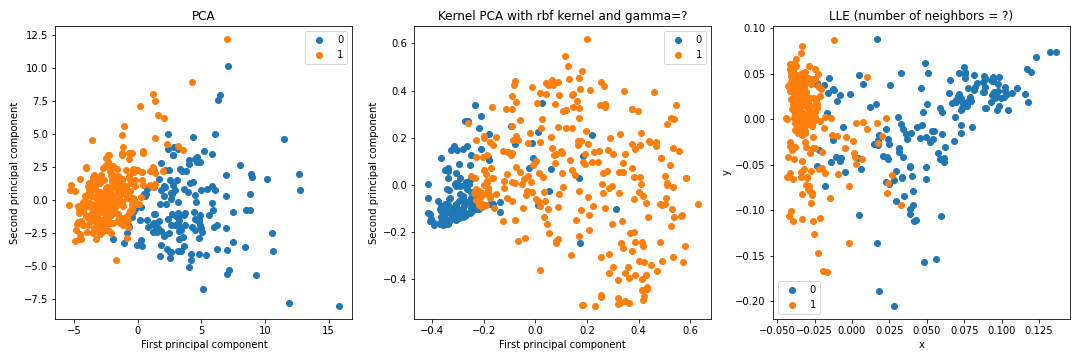

3. In-line comments are required to explain your codes.

Grading is based on the following:
1. You should implement each algorithm correctly. 
2. Comments are included. 
3. Visualization is clear and meets the requirements.





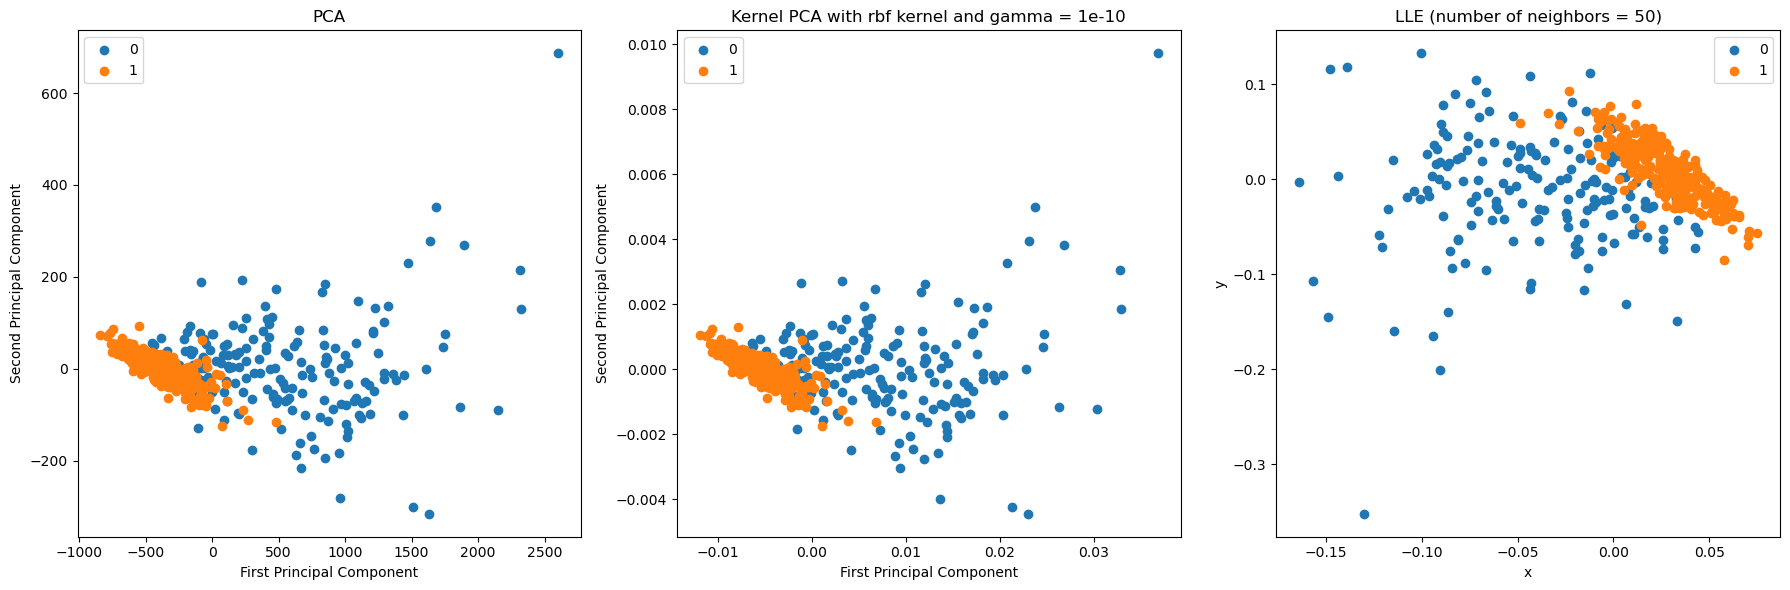

In [5]:
# set up dimension reduction algorithms w/ parameters
pca = PCA()
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 1e-10)
lle = LocallyLinearEmbedding(n_components = 10, n_neighbors = 50)

# apply algorithms on training data
X_pca = pca.fit_transform(X_train)
X_kernel_pca = rbf_pca.fit_transform(X_train)
X_lle = lle.fit_transform(X_train)

# set up plots
fig, ax = plt.subplots(1, 3, sharey = False, figsize = (18, 6))

# plot first 2 components of each algorithm for each target value of dataset to observe any patterns
for label in np.unique(y_train):

    # plot PCA components
    ax[0].scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1], label = label)

    # plot Kernel PCA components
    ax[1].scatter(X_kernel_pca[y_train == label, 0], X_kernel_pca[y_train == label, 1], label = label)

    # plot LLE components
    ax[2].scatter(X_lle[y_train == label, 0], X_lle[y_train == label, 1], label = label)



# Set titles and legends for each plot
ax[0].set(xlabel = 'First Principal Component', ylabel = 'Second Principal Component')
ax[0].set_title('PCA')
ax[0].legend()

ax[1].set(xlabel = 'First Principal Component', ylabel = 'Second Principal Component')
ax[1].set_title('Kernel PCA with rbf kernel and gamma = ' + str(1e-10))
ax[1].legend()

ax[2].set(xlabel = 'x', ylabel = 'y')
ax[2].set_title('LLE (number of neighbors = 50)')
ax[2].legend()

fig.tight_layout()

## Part 3: Train classification models

In this part, you will train several models using **reduced training samples**.

* First of all, based on your visualization result in part 2, please determine which dimension reduction technique you want to use for part 3 and state the reason.

* Second, please do dimension reduction on training samples using the technique you select. (This step is the same as part 2, so you do not need to repeat the code, you can use what you obtain from part 2)

* Third, you should train k-nearest-neighbors, logistic regression, decision tree, random forest, and voting classifier models (use all models mention before) on reduced training samples and then report test accuracy.

* Last, show the decision region for each model. Please look at this reference [code](https://nbviewer.org/github/PhilChodrow/PIC16A/blob/master/live_lectures/22-live-lecture.ipynb) and visualize the decision regions. You should write a function to draw decision region for any classification model and any data samples. Function docstring is required.

Please follow the following instructions and finish part 3. Inline comments are required for your code.

#### 3(a) Determine the dimension reduction technique you will use and state the reason

I will be using PCA because it is the simplest out of all 3 techniques given that it uses linear formulas and the PCA plot seems to identify separate clusters for each of the target values, which is what we want.

#### 3(b) Do dimension reduction

You can repeat part 2 or use results from part 2

In [6]:
#### Your code here

# pca = PCA()

# X_pca = pca.fit_transform(X_train)

# only want to train on first 2 components

# reduced training data after PCA
X_pca_train = X_pca[:, :2]

# apply PCA to test data as well
X_pca_test = pca.transform(X_test)[:, :2]

#### 3(c) Write a function to draw decision region

Your function looks similar as the function in the sample codes, but you should modify the code because it only works for penguin data.

Docsting and inline comments are required.

In [7]:
#### Your function here

# def decision_region(model, test_data):

# x0 = X_pca_test[:, 0]
# x1 = X_pca_test[:, 1]

# grid_x = np.linspace(x0.min(), x0.max(), 501)
# grid_y = np.linspace(x1.min(), x1.max(), 501)
# xx, yy = np.meshgrid(x0, x1)

# XX = xx.ravel()
# YY = yy.ravel()

# XY = pd.DataFrame({
#     "Component 1": XX,
#     "Component 2": YY
# })

# p = neigh.predict(XY)
# p = p.reshape(xx.shape)

# fig, ax = plt.subplots(1)

# ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2)

# ax.scatter(x0, x1, c = y_test, cmap = "jet")


#### 3(d) Train k-nearest-neighbors model

You should try different k's and select the best one. You can either use cross-validation or train models using different k manually.

Print the test accuracy for all models, and draw the decision region for the model with the best k.

In [8]:
#### Your code here

best_k = -np.inf
best_score = -np.inf


for k in range(1, 31):
    
    neigh = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(neigh, X_pca_train, y_train, cv = 5).mean()
    neigh.fit(X_pca_train, y_train)

    print(f"N_neighbors: {k} with test accuracy {neigh.score(X_pca_test, y_test):.3f}")

    if score > best_score:
        best_k = k
        best_score = score


neigh = KNeighborsClassifier(n_neighbors = best_k)
neigh.fit(X_pca_train, y_train)

acc = neigh.score(X_pca_test, y_test)
print('\n', f'Test accuracy is {acc:.3f}')

N_neighbors: 1 with test accuracy 0.877
N_neighbors: 2 with test accuracy 0.868
N_neighbors: 3 with test accuracy 0.904
N_neighbors: 4 with test accuracy 0.895
N_neighbors: 5 with test accuracy 0.930
N_neighbors: 6 with test accuracy 0.921
N_neighbors: 7 with test accuracy 0.947
N_neighbors: 8 with test accuracy 0.947
N_neighbors: 9 with test accuracy 0.965
N_neighbors: 10 with test accuracy 0.965
N_neighbors: 11 with test accuracy 0.974
N_neighbors: 12 with test accuracy 0.974
N_neighbors: 13 with test accuracy 0.974
N_neighbors: 14 with test accuracy 0.974
N_neighbors: 15 with test accuracy 0.974
N_neighbors: 16 with test accuracy 0.965
N_neighbors: 17 with test accuracy 0.974
N_neighbors: 18 with test accuracy 0.974
N_neighbors: 19 with test accuracy 0.974
N_neighbors: 20 with test accuracy 0.974
N_neighbors: 21 with test accuracy 0.974
N_neighbors: 22 with test accuracy 0.965
N_neighbors: 23 with test accuracy 0.956
N_neighbors: 24 with test accuracy 0.956
N_neighbors: 25 with test

#### 3(e) Train logistic regression model

No hyperparameter selection needed. 

Print the test accuracy, and draw the decision region.

In [9]:
#### Your code here

Log = LogisticRegression().fit(X_pca_train, y_train)

acc = Log.score(X_pca_test, y_test)
print(f'Test accuracy is {acc:.2f}')

Test accuracy is 0.94


#### 3(f) Train decision tree

You should try different `max_depth` and select the best one.

Print the test accuracy for all models, and draw the decision region with the best `max_depth`.

In [10]:
#### Your code here

best_depth = -np.inf
best_score = -np.inf


for d in range(1, 31):
    
    Tree = DecisionTreeClassifier(max_depth = d)
    score = cross_val_score(Tree, X_pca_train, y_train, cv = 5).mean()
    Tree.fit(X_pca_train, y_train)

    print(f"Max depth: {d} with test accuracy {Tree.score(X_pca_test, y_test):.3f}")

    if score > best_score:
        best_depth = d
        best_score = score


Tree = DecisionTreeClassifier(max_depth = best_depth)
Tree.fit(X_pca_train, y_train)

acc = Tree.score(X_pca_test, y_test)
print('\n', f'Test accuracy is {acc:.3f}')

Max depth: 1 with test accuracy 0.886
Max depth: 2 with test accuracy 0.886
Max depth: 3 with test accuracy 0.904
Max depth: 4 with test accuracy 0.904
Max depth: 5 with test accuracy 0.877
Max depth: 6 with test accuracy 0.868
Max depth: 7 with test accuracy 0.868
Max depth: 8 with test accuracy 0.877
Max depth: 9 with test accuracy 0.860
Max depth: 10 with test accuracy 0.877
Max depth: 11 with test accuracy 0.851
Max depth: 12 with test accuracy 0.860
Max depth: 13 with test accuracy 0.868
Max depth: 14 with test accuracy 0.868
Max depth: 15 with test accuracy 0.868
Max depth: 16 with test accuracy 0.851
Max depth: 17 with test accuracy 0.860
Max depth: 18 with test accuracy 0.868
Max depth: 19 with test accuracy 0.877
Max depth: 20 with test accuracy 0.860
Max depth: 21 with test accuracy 0.860
Max depth: 22 with test accuracy 0.868
Max depth: 23 with test accuracy 0.877
Max depth: 24 with test accuracy 0.851
Max depth: 25 with test accuracy 0.851
Max depth: 26 with test accuracy 0

#### 3(g) Train random forest

You should try different `max_depth` and `n_estimators`, then select the best hyperparameters.

Print the test accuracy for all models, and draw the decision region of the model with selected `max_depth` and `n_estimators`.

In [11]:
#### Your code here

trees = np.arange(10, 110, 10)

best_depth = -np.inf
best_estimators = -np.inf
best_score = -np.inf


for d in range(1, 31):
    for tree in trees:
        rf = RandomForestClassifier(max_depth = d, n_estimators = tree)
        score = cross_val_score(rf, X_pca_train, y_train, cv = 5).mean()
        rf.fit(X_pca_train, y_train)

        print(f"Max depth: {d} and n_estimators: {tree} with test accuracy {rf.score(X_pca_test, y_test):.3f}")

        if score > best_score:
            best_depth = d
            best_estimators = tree
            best_score = score


rf = RandomForestClassifier(max_depth = best_depth, n_estimators = best_estimators)
rf.fit(X_pca_train, y_train)

acc = rf.score(X_pca_test, y_test)
print('\n', f'Test accuracy is {acc:.3f}')

Max depth: 1 and n_estimators: 10 with test accuracy 0.860
Max depth: 1 and n_estimators: 20 with test accuracy 0.895
Max depth: 1 and n_estimators: 30 with test accuracy 0.912
Max depth: 1 and n_estimators: 40 with test accuracy 0.930
Max depth: 1 and n_estimators: 50 with test accuracy 0.904
Max depth: 1 and n_estimators: 60 with test accuracy 0.904
Max depth: 1 and n_estimators: 70 with test accuracy 0.904
Max depth: 1 and n_estimators: 80 with test accuracy 0.939
Max depth: 1 and n_estimators: 90 with test accuracy 0.904
Max depth: 1 and n_estimators: 100 with test accuracy 0.895
Max depth: 2 and n_estimators: 10 with test accuracy 0.904
Max depth: 2 and n_estimators: 20 with test accuracy 0.904
Max depth: 2 and n_estimators: 30 with test accuracy 0.886
Max depth: 2 and n_estimators: 40 with test accuracy 0.904
Max depth: 2 and n_estimators: 50 with test accuracy 0.904
Max depth: 2 and n_estimators: 60 with test accuracy 0.921
Max depth: 2 and n_estimators: 70 with test accuracy 0.

#### 3(h) Train max voting classifier

You should use the hyperparameters you select before. 

Print the test accuracy, and draw the decision region.

In [15]:
#### Your code here

voting_clf = VotingClassifier(estimators = [('kn', neigh),
                                            ('lr', Log),
                                            ('tree', Tree),
                                            ('rforest', rf)],
                              voting = 'hard')

voting_clf.fit(X_pca_train, y_train)

acc = voting_clf.score(X_pca_test, y_test)
print(f'Test accuracy is {acc:.3f}')

Test accuracy is 0.912
